## Assignment 5

In this assignment, we will linearize a nonlinear dynamical model to perform trajectory tracking using Linear Quadratic Regulator (LQR). Consider the following second order nonlinear differential equation for the **inverted pendulum** model. Find the installation information for the python control package at https://python-control.readthedocs.io/en/0.9.0/intro.html.

Let $g$ and $L$ are the gravitational acceleration, the length of the pendulum arm repectively and,

$$ f: \ddot{\theta} = - \frac{g}{L} sin(\theta) -d\dot{\theta} + u,$$

where $u$ is the torque input provided by the motor attached to the pendulum arm.
By changing $u$ we can control the pendulum's state over the 2-D plane, $\mathbb{R}^2$. Here $d$ denotes a damping coefficient, which induce a resistance to the swing of the pendulum.
<img src="pendulum.png" alt="Pendulum" width="200"/>

**Part (a)**
Consider the two system states as the angle $\theta$ and the angular velocity $\dot{\theta}$. Convert $f$ into two first order nonlinear differential equations for describing the evolution of the each state. Show all the steps of the coversion. (10 Points)

**Part (b)**
Let $f_1$ and $f_2$ be the two differential equations. Linearize them using the first order Taylor series expansion to obtain the **algebraic** $A$ and $B$ matrices. Use the shorthand method discussed in the class (slide 9,10 of linear dynamical systems lecture part 2). Show all the steps of the partial differentiation. Discuss why is it important to linearize a nonlinear dynamical system. (15 points)

**Part (c)**
Consider the two fixed points of the pendulum $\theta = 0$ and $\theta = \pi$ radians. Substitute each fixed point to algebraic $A$, $B$ to obtain the linearized dynamical systems near the two fixed points, $A_u$ and $A_d$. 

Use $L = 2m$, $g = 10ms^{-2}$, $d = 1$. (10 points)

**Part (d)**
At which of these fixed points does the pendulum become stable? Support your argument by using the concept of stability of linear dynamical systems. (20 points)

**Part (e)**
Simulate the system for 10 seconds at upper ($\theta = 0$) and lower ($\theta = \pi$) fixed points with an initial angular velocity $\dot{\theta} = 0.5$ rad/s for both cases. Consider $u=0$ and the pendulum is oscillating freely. Ditto for $d=0$ scenario. Refer to the plots in the slides to verify your results.
Discuss how does the pendulum's behavior change, for large and small damping coefficients. If the motor had friction, will the system equation change? (15 points)

**Part (f)**
Let's implement a full state linear feedback controller (LQR) to stabilize the pendulum at the upper fixed point. Let's first identify the dimensions of the $Q$ and $R$ weight matrices. Consider the objective function for LQR, $J = (x - x^*)^TQ(x - x^*) + (u - u^*)^TR(u - u^*)$. 

Here $x, x^* \in \mathbf{R}^{2 \times 1}$ and, denote the current state vector and the state vector at the fixed points. Similarly, $u, u^* \in \mathbf{R}$ and denote the current control vector and the control vector at the fixed points. Therefore we can understand $ Q \in \mathbb{R}^{2 \times 2}$ and $ R \in \mathbb{R}$ to reallize the matrix multiplication in the cost function.

At the fixed points we like the system to be stationary, thus we use the fixed point state of the system as $x^* = [0, 0]^T$. This means that the system is stabilized at the upper fixed point with $\theta = 0$ and zero angular velocity, $\dot{\theta}=0$. Further, as the pendulum is capable of stabilizing by it's own, our desired $u^* = 0$. However, in the differentiation $u$ gets cancelled and we can ignore $u^*$.

Use **control.lqr(A, B, Q, R)** function in python to compute the gain matrix $k$ for the control rule $u = -k (x-x^*)$ at the upper fixed point. Make sure to use the corresponding $A$ matrix. Find the documentation for the lqr function at https://python-control.readthedocs.io/en/0.8.3/generated/control.lqr.html.

Plot the change of the two state variables $\theta$, $\dot{\theta}$ against time for following $Q$ and $R$ matrices. Visualize the swing of the pendulum with the animate code provided herewith.

Case 1:
$ Q = \begin{bmatrix}
100 & 0 \\
0 & 100 
\end{bmatrix}  $ $R = [1]$

Case 2:
$ Q = \begin{bmatrix}
500 & 0 \\
0 & 500 
\end{bmatrix}  $ $R = [1]$ 

Discuss why does the system behave differently in two different cases by referring to the cost function $J$. (30 points)

In [30]:
from scipy.integrate import odeint
import numpy as np
import pylab as p 
import math
import control

# gravitational acceleration
g = -10

# length of the pendulum arm
L = 2

# integration duration and period
period = 0.01
duration = 10

In [27]:
# integration function
# k: is the gain matrix (2x1) computed by LQR
# d: damping coefficient
# goal: desired fixed point
def f(x, t, x_star, k, d):
    
#     calculate the error/deviation from the fixed point x_bar = x-x*
    
#     use the control law u = -kx_bar
#     checkout for matrix dimensions

#     write your differential equations to update theta and thetadot
# d_theta = 
# d_thetadot = 

#     use newly calculated u in the equations
    
    f_dot = [d_theta, d_thetadot]
    return f_dot

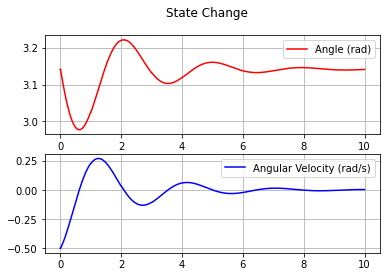

In [28]:
# weight matrices
Q = np.eye(2)*200
R = np.matrix([[1]])

# damping coefficient
d = 0

# A matrix for the upper and down fixed point
# Au = 
# Ad = 

# B matrix 
# B = 

# get the gain matrix for stabilizing the system (ignore s and e return values)
# k, s, e = control.lqr(A, B, Q, R)
# k = np.matrix(k)

# initial condition (change this accordingly)
# y0 = 

# desired fp to stabilize the system
# fixed_upper = [0, 0]

# use traj to store integration values
# traj = y0


# simulate system
step = 0.01
duration = 10

# integrate the system every second using odeint. use step as the integration step
# the final state of each second should be the initial condition for next second
# use traj variable to store the change in theta and thetadot by appending the results of each integration

# times for simulation and plotting
ts = np.transpose(np.linspace(0, duration, len(traj)))

# plot the angle
p.figure(0)
p.suptitle('State Change')
p.subplot(2, 1, 1)
p.plot(ts, traj[:,0],'-r', label='Angle (rad)')
p.grid('on')
p.legend(loc='best')

# plot the angular velocity
p.subplot(2, 1, 2)
p.plot(ts, traj[:,1], '-b', label='Angular Velocity (rad/s)')
p.grid('on')
p.legend(loc='best')
p.show()


**Animation code**

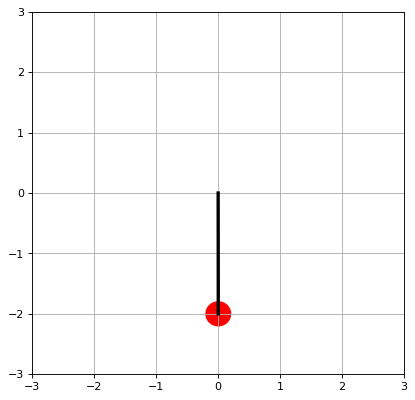

In [29]:
# visualize trajectory
from matplotlib.animation import FuncAnimation

fig = p.figure(figsize=(6, 6),dpi=80)
ax = p.axes(xlim=(-3, 3), ylim=(-3, 3))
line, = ax.plot([], [], lw=3, color='black')
circle = p.Circle((0, 2), 0.2, color='r')
ax.add_patch(circle)
p.grid('on')

def animate(i):
#     read the angle theta from the trajectory
    theta = traj[i*10, 0]
#     set the pendulum end position
    pendx = L*np.sin(theta)
    pendy = L*np.cos(theta)
   
    line.set_xdata(np.array([0, pendx]))
    line.set_ydata(np.array([0, pendy]))
    circle.center = (pendx, pendy)
    return line,

# only use every 10th frame to animate faster
anim = FuncAnimation(fig, animate, frames= 100, interval=0.1, blit=True)
anim.save('pendulum.gif', writer='imagemagick')